# Analisis Salarios Colombia

por: Jose R. Zapata - https://joserzapata.github.io/

Link: https://joserzapata.github.io/post/


En base a los cambios que se han presentado en la reforma tributaria en Colombia en el 2022 y como se ven afectados los salarios de los trabajadores, se realiza un análisis de los salarios en Colombia para entender cuanto se le descuenta a un trabajador y cuanto seria el dinero que recibe en su bolsillo.


## Descuentos en salarios en Colombia

Para conocer cuanto se le descuenta a un trabajador en Colombia es necesario  tener en cuenta los decuentos por:
 - Salud (4%)
 - Pension (4%)
 - ARL (0.5% pero varia segun el riesgo)
 - Retencion en la fuente [Articulo 383 del estatuto tributario](https://estatuto.co/383)

Los calculos son diferentes para asalariados que reciben el [salario integral](https://loggro.com/blog/articulo/como-calcular-el-salario-integral-loggro-nomina/)

la tabla de retención en la fuente que esta en base a los valores de UVT (Unidad de Valor Tributario) y que se actualiza cada año. 

### Porcentaje de retencion en la fuente

los rango estan representados en UVT (2023) = $42.412 pesos

 | Rangos en UVT  | Tarifa marginal | retención en la fuente |
| -------------   | --------------- | ----------------------- |
| 0 a 95          | 0%  |                                     |
| \>95 a 150      | 19% | (Ingreso laboral gravado expresado en UVT menos 95 UVT)\*19%               |
| \>150 a 360     | 28% | (Ingreso laboral gravado expresado en UVT menos 150 UVT)\*28% más 10 UVT |
| \>360 a  640    | 33% | (Ingreso laboral gravado expresado en UVT menos 360 UVT)\*33% más 69 UVT   |
| \>640 a  945    | 35% | (Ingreso laboral gravado expresado en UVT menos 640 UVT)\*35% más 162 UVT  |
| \>945 a  2300   | 37% | (Ingreso laboral gravado expresado en UVT menos 945 UVT)\*37% más 268 UVT  |
| \>2300 En adelante |  39%| (Ingreso laboral gravado expresado en UVT menos 2300 UVT)\*39% más 770 UVT |

Nota: Sera unicamente para salarios y no tendra en cuenta ingresos extra. Ademas el analisis se va realizar para un rago salarial de 1'160.000 pesos (salario minimo) a 50'894.400 pesos (1200 UVT)




[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JoseRZapata/covid_plots/blob/main/notebooks/Covid19_Visualizacion_es.ipynb) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/JoseRZapata/covid_plots/HEAD?labpath=notebooks%2FCovid19_Visualizacion_es.ipynb)  [![nbviewer](https://img.shields.io/badge/render-nbviewer-orange.svg)](https://nbviewer.jupyter.org/github/JoseRZapata/covid_plots/blob/main/notebooks/Covid19_Visualizacion_es.ipynb)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#import chart_studio

import plotly.express as px

In [2]:
#print pandas, px an numpy version
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)

pandas version:  2.1.3
numpy version:  1.26.2


In [3]:
# Leer archivo con los datos de acceso a chart_studio
# si no esta, dejar los campos vacios
#try:
#    with open("../../info_chart.csv","r") as f:
#        info_user = f.read().split(";")
#        username = info_user[0] # your username
#        api_key = info_user[1] # your api key
#        print('api_key loaded!')
#except:
#    username = '' # your username
#    api_key =''
#
#if api_key: chart_studio.tools.set_credentials_file(username=username, api_key=api_key)


# Codigo Fuente Jupyter notebook
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JoseRZapata/covid_plots/blob/main/notebooks/Covid19_Visualizacion_es.ipynb) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/JoseRZapata/covid_plots/HEAD?labpath=notebooks%2FCovid19_Visualizacion_es.ipynb)  [![nbviewer](https://img.shields.io/badge/render-nbviewer-orange.svg)](https://nbviewer.jupyter.org/github/JoseRZapata/covid_plots/blob/main/notebooks/Covid19_Visualizacion_es.ipynb)

In [4]:
# constantes globales
uvt = 42_412
salario_minimo = 1_160_000
subsido_transporte = 140_606
# salario integral = 10 salarios minimos + 30% prestaciones
salario_integral = salario_minimo*(10)*(1 + 0.3)
print(f'salario integral: {salario_integral}')

salario integral: 15080000.0


In [5]:
sala = 21_383_586 + 361_200 + 145_000
rete_final = (((sala/uvt - 360)*0.33 + 69))*uvt
rete_final

5111511.78

En base a la tabla de rangos de retencion en la fuente presentado anteriormente,
voy a generar los rangos de ingresos mensuales.

Lo valores empezaran desde el salario minimo legal vigente en Colombia para el 2023 que es de 1'160.000 pesos colombianos.
Equivalente a 27.351 UVT (Unidad de Valor Tributario) para el 2023.

In [6]:
#rangos en uvt
rango = np.arange(28, 1201)

#convertir rango a tipo float
rango = rango.astype(float)

#agregar el valor e de 27.35 como primer elemento
rango = np.insert(rango, 0, salario_minimo/uvt)

In [7]:
salario_col = pd.DataFrame(rango, columns=['n_uvt'])
salario_col['salario_pesos'] = ((salario_col['n_uvt'] * uvt)
                                .astype(int))

In [8]:
# funcion para calcular el pago de salud y pension
def pago_salud_pension(salario_pesos: int,
                       salario_integral: int = salario_integral
                       )-> int:
    """ 
    Calcula el pago de salud y pension para un salario dado en pesos,
    es igual al 4% del salario si es menor al salario integral,
    si es mayor al salario integral es igual al 4% del 70% del salario
    
    Args:
        salario_pesos (int): salario en pesos
        salario_integral (int): salario integral en pesos
    Returns:
        int: pago de salud y pension       
    
    """
    
    if salario_pesos < salario_integral:
        if salario_pesos < salario_minimo:
            aportes_salud_pension = salario_minimo * 0.04
        else:
            aportes_salud_pension =  salario_pesos * 0.04
        
    else:
        aportes_salud_pension = salario_pesos *.7 * 0.04
         
    return aportes_salud_pension

In [9]:
salario_col['pago_salud'] = (salario_col['salario_pesos']
                                   .apply(pago_salud_pension,
                                          salario_integral=salario_integral))
salario_col['pago_pension'] = salario_col['pago_salud']

In [18]:
# Auxilio de transporte igual a 140606 si salario es menor a 2 salarios minimos,
# de lo contrario es 0

salario_col['aux_transporte'] = np.where(salario_col['salario_pesos'] <= 2*salario_minimo,
                                            subsido_transporte, 0)



In [10]:
# funcion para calcular la retencion en la fuente

def retencion_fuente(n_uvt:float,
                     uvt:int )->float:
    """
    Calcula la retencion en la fuente para un salario en uvt
    
    Args:
        n_uvt (float): salario en uvt
        uvt (int): valor de un uvt
    
    Returns:
        float: valor de la retencion en la fuente en pesos       
    """
    # la tupla se compone de:
    # limite inferior, limite superior, porcentaje, uvt que se suman
    rangos = [(0,   95,  0, 0),
              (96,  150, 0.19, 0),
              (151, 360, 0.28, 10),
              (361, 640, 0.33, 69),
              (641, 945, 0.35, 162),
              (946, 2300, 0.37, 268)]
    retencion = 0
    for limite_inf, limite_sup, porcentaje, base in rangos:
        if (limite_inf <= n_uvt <= limite_sup):
            retencion = (n_uvt - (limite_inf-1)) * porcentaje + base
            break
    else:
        retencion = (n_uvt - 2300) * 0.37 + 268
    return retencion * uvt        

In [11]:
salario_col['retencion_fuente'] = (salario_col['n_uvt']
                                   .apply(retencion_fuente,
                                          uvt=uvt))

In [19]:
#corregir esta malo
salario_col.sample(10)

,n_uvt,salario_pesos,pago_salud,pago_pension,retencion_fuente,salario_neto,aux_transporte
977,1004.0,42581648,1192286.144,1192286.144,12292269.96,2.790481e+07,0
989,1016.0,43090592,1206536.576,1206536.576,12480579.24,2.819694e+07,0
22,49.0,2078188,83127.520,83127.520,0.00,1.911933e+06,140606
575,602.0,25532024,714896.672,714896.672,6313450.32,1.778878e+07,0
129,156.0,6616272,264650.880,264650.880,495372.16,5.591598e+06,0
16,43.0,1823716,72948.640,72948.640,0.00,1.677819e+06,140606
604,631.0,26761972,749335.216,749335.216,6719333.16,1.854397e+07,0
595,622.0,26380264,738647.392,738647.392,6593369.52,1.830960e+07,0
1084,1111.0,47119732,1319352.496,1319352.496,13971361.04,3.050967e+07,0
952,979.0,41521348,1162597.744,1162597.744,11899958.96,2.729619e+07,0


In [13]:
# Dinero entregado al empleado
salario_col['salario_neto'] = (salario_col['salario_pesos']
                               + salario_col['aux_transporte'] 
                               - salario_col['pago_salud']
                               - salario_col['pago_pension']
                               - salario_col['retencion_fuente']
                               )

grafica salario en pesos, salario recibido mensual

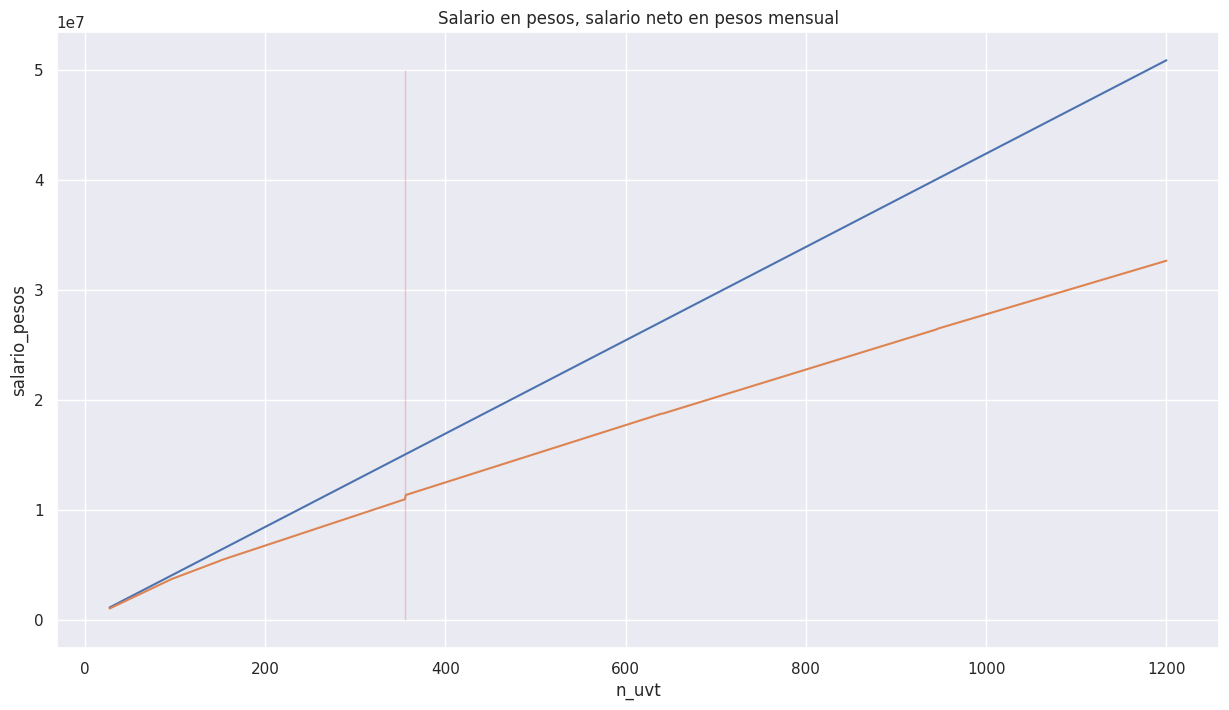

In [21]:
# salario integral en uvt
salario_inte_uvt = salario_integral/uvt

sns.set(rc={'figure.figsize':(15, 8)})
# plot 'salario_pesos' y 'salario_neto' vs 'n_uvt' con seaborn
sns.lineplot(x='n_uvt', y='salario_pesos', data=salario_col)
sns.lineplot(x='n_uvt', y='salario_neto', data=salario_col)
# add vertical line in n_uvt = 10
(sns.lineplot(x=[int(salario_inte_uvt),int(salario_inte_uvt)]
             , y=[0, 50_000_000], color='red', linestyle='--')
    .set_title('Salario en pesos, salario neto en pesos mensual'));




grafica salario en pesos, salario recibido Anual

In [31]:
salario_col['prima'] = (salario_col['salario_pesos'] 
                        + salario_col['aux_transporte'])/2
salario_col['salario_con_prima'] = (salario_col['salario_pesos']
                                    + salario_col['prima'])

# retencion de salario mensual con prima
salario_col['retencion_fuente_prima'] = (salario_col['salario_con_prima']
                                            .apply(retencion_fuente,
                                            uvt=uvt))

# si salario pesos es mayor de salario_integral prima es 0
salario_col['prima'] = np.where(salario_col['salario_pesos'] >= salario_integral,
                                0, salario_col['prima'])

salario_col['cesantias'] = salario_col['prima']*2

In [32]:
salario_col['salario_anual'] = (salario_col['salario_pesos'] * 12 
                                + salario_col['prima']*2 
                                + salario_col['cesantias'])

#falta hacer el salario_anual_neto tener en cuenta
# la retencion en la fuente de los meses que se recibe la prima
salario_col['salario_anual_neto'] = ((salario_col['salario_pesos']
                                     - salario_col['retencion_fuente'])*10

In [33]:
salario_col.sample(10)

,n_uvt,salario_pesos,pago_salud,pago_pension,retencion_fuente,salario_neto,aux_transporte,salario_con_prima,retencion_fuente_prima,prima,cesantias,salario_anual
123,150.0,6361800,254472.000,254472.000,443205.40,5.409651e+06,0,9542700.0,1.497235e+11,3180900.0,6361800.0,89065200.0
230,257.0,10899884,435995.360,435995.360,1694783.52,8.333110e+06,0,16349826.0,2.565439e+11,5449942.0,10899884.0,152598376.0
863,890.0,37746680,1056907.040,1056907.040,10581794.00,2.505107e+07,0,56620020.0,8.884815e+11,0.0,0.0,452960160.0
294,321.0,13614252,544570.080,544570.080,2454806.56,1.007031e+07,0,20421378.0,3.204365e+11,6807126.0,13614252.0,190599528.0
124,151.0,6404212,256168.480,256168.480,435995.36,5.455880e+06,0,9606318.0,1.507218e+11,3202106.0,6404212.0,89658968.0
914,941.0,39909692,1117471.376,1117471.376,11338848.20,2.633590e+07,0,59864538.0,9.393959e+11,0.0,0.0,478916304.0
1151,1178.0,49961336,1398917.408,1398917.408,15022754.52,3.214075e+07,0,74942004.0,1.175998e+12,0.0,0.0,599536032.0
60,87.0,3689844,147593.760,147593.760,0.00,3.394656e+06,0,5534766.0,8.682926e+10,1844922.0,3689844.0,51657816.0
139,166.0,7040392,281615.680,281615.680,614125.76,5.863035e+06,0,10560588.0,1.656967e+11,3520196.0,7040392.0,98565488.0
602,629.0,26677148,746960.144,746960.144,6691341.24,1.849189e+07,0,40015722.0,6.279196e+11,0.0,0.0,320125776.0


# Refencias

- https://blog.alegra.com/retencion-en-la-fuente/
- https://www.consultorcontable.com/retenci%C3%B3n-salarios/
- https://loggro.com/blog/articulo/conozca-como-quedo-el-salario-minimo-y-salario-integral-en-2023/
- https://loggro.com/blog/articulo/como-calcular-el-salario-integral-loggro-nomina/
- 

